In [1]:
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Importing the required ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Importing the PCA
from sklearn.decomposition import PCA

In [2]:
# Importing the required data
wine_file=r'C:\Users\DELL\Desktop\MLStudy\Kaggle_Competitions\wine.csv'
df=pd.read_csv(wine_file)

In [3]:
#Making 2 subsets of the data
X=df.iloc[:,:13]
y=df.iloc[:,13]

In [4]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,train_size=0.8)

In [5]:
# Scaling the data
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)


In [6]:
# Initialzing the PCA with 2 proncipal components only
pca=PCA(n_components=2)

In [7]:
# Fitting & transforming the pca on the train & then using the same for transforming the test dataset
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [8]:
# Checking the explained variance
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36457748, 0.20234607])

In [9]:
# Instantiating the logistic regression
lr=LogisticRegression(random_state=100)
lr.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [10]:
# Predicting the output results for the test dataset
y_predict=lr.predict(X_test)

In [11]:
# Creating the confusion matrix
cm =confusion_matrix(y_true=y_test,y_pred=y_predict)
cm

array([[ 8,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 13]], dtype=int64)

### Visualizations --> Thanks to Geekforgeeks

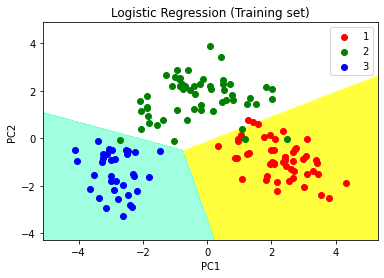

In [12]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()


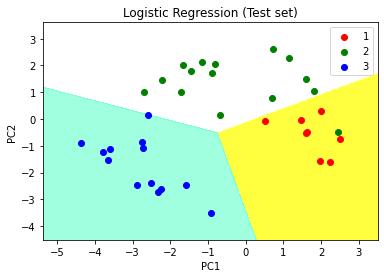

In [13]:
# Visualising the Test set results through scatter plot
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()

# show scatter plot
plt.show()


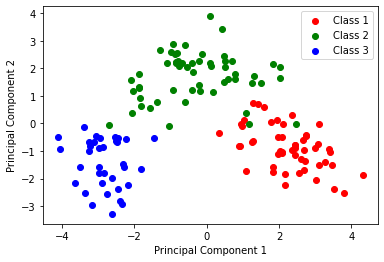

In [14]:
# plot the first two principal components with labels
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
